<center><h1>Recommender System for Rent the Runway</h1></center><br>
<center>Author: Czarina G Luna</center> 

![image](header.png)

## Contents <a class='anchor' id='Content'></a>
* [Summary](#Summary)
* [1 Business Understanding](#Business)
* [2 Data Understanding](#Data)
    * [2.1 Data Pre-processing](#Data-prep)
    * [2.2 Data Visualization](#Data-vis)
    * [2.3 Natural Language Processing](#NLP)
* [3 Data Methodology](#Data-meth)
    * [3.1 Popularity Recommendation](#Method-1)
    * [3.2 Content-Based Recommendation](#Method-2)
    * [3.3 Collaborative Filtering Recommendation](#Method-3)
* [4 Results and Recommendations](#Result)
* [5 Next Steps](#Next)
* [Contact](#Contact)

## SUMMARY <a class='anchor' id='Overview'></a>
    Business problem. Data and methods. Final recommender system. Test results. Business recommendations.

[Contents](#Content)

## 1 Business Understanding <a class='anchor' id='Business'></a>

## 2 Data Understanding <a class='anchor' id='Data'></a>

In [1]:
import pandas as pd
RAW_DATA = pd.read_csv('rent_the_runway.csv')
RAW_DATA.head(2)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"


## ☒ Create table showing info:

### 2.1 Data Pre-processing <a class='anchor' id='Data-prep'></a>
    Describe pre-processing steps taken

In [7]:
import warnings
warnings.filterwarnings('ignore')

def convert_height(x):
    '''
    Convert height from string format as feet and inches to integer in inches
    '''
    height = [int(i) for i in x.replace('\'', '').replace('"", '').split()]
    return height[0]*12 + height[1]

def preprocess(df):
    '''
    Parameters:
    ----------
    Returns: 
    '''
    df.columns = df.columns.str.replace(' ', '_')
    df = df.dropna(subset='rating')
    
    df['weight'] = df['weight'].str.replace('lbs', '')
    df['rating'] = df['rating']/2
    df['height'] = df['height'].apply(lambda x: convert_height(x) if pd.notnull(x) else x)
    
    to_num = ['rating', 'weight', 'age']
    df[to_num] = df[to_num].apply(pd.to_numeric, errors='coerce')
    
    for col in ['height', 'age']:
        df[col] = df[col].fillna(df[col].median())
        
    weight_map = dict(df.groupby('height')['weight'].median())
    df['weight'] = df['weight'].fillna(df['height'].map(weight_map))
    
    df['review'] = df['review_summary'] + ' ' + df['review_text']
    df['review'] = df['review'].fillna('')
    df['review_length'] = df['review_text'].fillna('').apply(lambda x: len(x.split()))
        
    age_limit = (df['age'] > 60) | (df['age'] < 13)
    df['age'] = np.where(age_limit==True, df['age'].median(), df['age'])
    
    for col in ['bust_size', 'body_type']:
        to_map = dict(df.groupby('size')[col].last())
        df[col] = df[col].fillna(df['size'].map(to_map))
    
    df['rented_for'] = df['rented_for'].fillna(df['rented_for'].value_counts().index[0])
    
    df['review_date'] = pd.to_datetime(df['review_date'])
    df['review_month'] = pd.DatetimeIndex(df['review_date']).month
    df['review_season'] = pd.cut(df['review_month'].replace(12, 0), [0, 3, 6, 9, 11], include_lowest=True, labels=['Winter', 'Spring', 'Summer', 'Fall'])
    df['review_year'] = pd.DatetimeIndex(df['review_date']).year
    return df

### 2.2 Data Visualization <a class='anchor' id='Data-vis'></a>

In [38]:
# import pandas as pd
data = pd.read_csv('preprocessed_data.csv')

#### 2.2.1 User Research

In [50]:
user_data = data.copy()
user_data['item_count'] = user_data['item_id'].groupby(user_data['user_id']).transform('count')

#### 2.2.2 Product Knowledge

In [39]:
item_data = data.copy()
item_data['rating_count'] = item_data['rating'].groupby(item_data['item_id']).transform('count')
item_data['rating_average'] = item_data['rating'].groupby(item_data['item_id']).transform('mean')

#### 2.2.3 Time Series Analysis

### 2.3 Natural Language Processing <a class='anchor' id='NLP'></a>

## ☒ Add NLP code completed in [Colab notebook](https://colab.research.google.com/drive/1anuQLoYihRipKQqxQ_nCer4mF1RaEsLW?usp=sharing) and also here on [Github notebook](https://github.com/czarinagluna/Capstone-Proposal/blob/main/vader_sentiment_analysis.ipynb)

#### 2.3.1 Text Preprocessing

#### 2.3.2 Sentiment Analysis

#### 2.3.3 Document Clustering

## 3 Data Methodology <a class='anchor' id='Data-meth'></a>

## ☑︎ Item-item Recommendations with k-Nearest Neighbors

In [73]:
user_item_data = user_data.groupby('user_id')['item_count'].first().reset_index()
user_multiple_item_data = user_item_data.loc[user_item_data['item_count']>1]

df = data.loc[data['user_id'].isin(user_multiple_item_data['user_id'])]

In [92]:
n_ratings = len(df)
n_items = df['item_id'].nunique()
n_users = df['user_id'].nunique()

print(f'Number of ratings: {n_ratings}')
print(f'Number of unique items: {n_items}')
print(f'Number of unique users: {n_users}')
print(f'Average number of ratings per user: {round(n_ratings/n_users, 2)}')
print(f'Average number of ratings per item: {round(n_ratings/n_items, 2)}')

Number of ratings: 120690
Number of unique items: 5789
Number of unique users: 33736
Average number of ratings per user: 3.58
Average number of ratings per item: 20.85


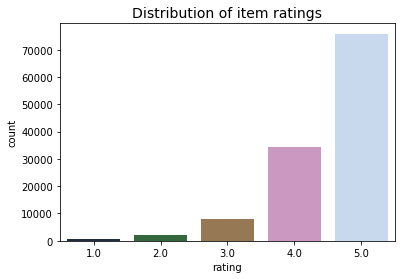

In [131]:
import matplotlib.pyplot as plt
sns.countplot(x='rating', data=df, palette='cubehelix')
plt.title('Distribution of item ratings', fontsize=14)
plt.show()

In [95]:
print(f'Mean global rating: {round(df['rating'].mean(),2)}.')

mean_ratings = df.groupby('user_id')['rating'].mean()
print(f'Mean rating per user: {round(mean_ratings.mean(),2)}.')

Mean global rating: 4.51.
Mean rating per user: 4.52.


In [108]:
from scipy.sparse import csr_matrix

def create_X(df):
    '''
    Generates a sparse matrix from ratings dataframe.

    Args:
        df: pandas dataframe containing 3 columns (user_id, item_id, rating)

    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        item_mapper: dict that maps item id's to item indices
        item_inv_mapper: dict that maps item indices to item id's
    '''
    M = df['user_id'].nunique()
    N = df['item_id'].nunique()

    user_mapper = dict(zip(np.unique(df['user_id']), list(range(M))))
    item_mapper = dict(zip(np.unique(df['item_id']), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df['user_id'])))
    item_inv_mapper = dict(zip(list(range(N)), np.unique(df['item_id'])))

    user_index = [user_mapper[i] for i in df['user_id']]
    item_index = [item_mapper[i] for i in df['item_id']]

    X = csr_matrix((df['rating'], (user_index,item_index)), shape=(M,N))

    return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_X(df)

In [109]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f'Matrix sparsity: {round(sparsity*100,2)}%')

Matrix sparsity: 0.06%


In [111]:
n_ratings_per_user = X.getnnz(axis=1)

print(f'Most active user rated {n_ratings_per_user.max()} items.')
print(f'Least active user rated {n_ratings_per_user.min()} item.')

Most active user rated 407 items.
Least active user rated 1 item.


In [133]:
n_ratings_per_item = X.getnnz(axis=0)

print(f'Most rated item has {n_ratings_per_item.max()} ratings.')
print(f'Least rated item has {n_ratings_per_item.min()} ratings.')

Most rated item has 873 ratings.
Least rated item has 1 ratings.


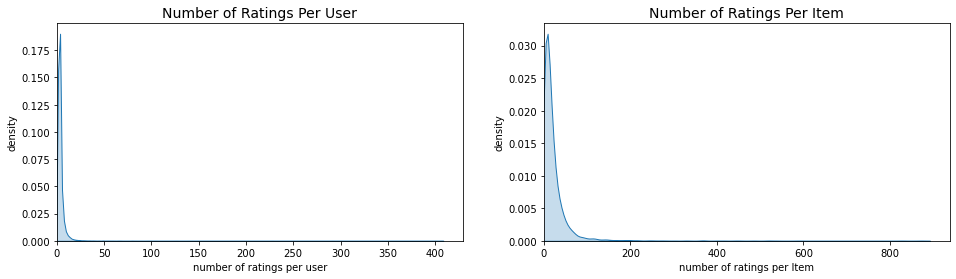

In [134]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title('Number of Ratings Per User', fontsize=14)
plt.xlabel('number of ratings per user')
plt.ylabel('density')
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_item, shade=True)
plt.xlim(0)
plt.title('Number of Ratings Per Item', fontsize=14)
plt.xlabel('number of ratings per Item')
plt.ylabel('density')
plt.show()

In [135]:
sum_ratings_per_item = X.sum(axis=0)
mean_rating_per_item = sum_ratings_per_item/n_ratings_per_item

In [137]:
X_mean_item = np.tile(mean_rating_per_item, (X.shape[0],1))

In [138]:
X_mean_item.shape

(33736, 5789)

In [139]:
X_norm = X - csr_matrix(X_mean_item)

In [140]:
print('Original X:', X[0].todense())
print('Normalized X:', X_norm[0].todense())

Original X: [[0. 0. 0. ... 0. 0. 0.]]
Normalized X: [[-4.32510288 -4.71346154 -4.57798165 ... -4.75       -4.66666667
  -4.5       ]]


In [141]:
from sklearn.neighbors import NearestNeighbors

def find_similar_items(item_id, X, item_mapper, item_inv_mapper, k, metric='cosine'):
    '''
    Finds k-nearest neighbours for a given item id.

    Args:
        item_id: id of the item of interest
        X: user-item utility matrix
        k: number of similar items to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar item ID's
    '''
    X = X.T
    neighbour_ids = []

    item_ind = item_mapper[item_id]
    item_vec = X[item_ind]
    if isinstance(item_vec, (np.ndarray)):
        item_vec = item_vec.reshape(1,-1)
    # use k+1 since kNN output includes the item_id of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm='brute', metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(item_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(item_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [147]:
similar_items = find_similar_items(2260466, X_norm, item_mapper, item_inv_mapper, k=10)
similar_items

[1964998, 1862873, 849722, 2048890, 1781081, 931157, 1202098, 728996, 1512186]

### 3.1 Popularity Recommendation <a class='anchor' id='Method-1'></a>

In [42]:
item_rating_data = item_data.groupby('item_id')[['rating_count', 'rating_average']].first().reset_index()

#### Bayesian Average

$$W = \left(\frac{v}{v + m} \right)R + \left(\frac{m}{v + m} \right)C$$
where:

$W$ = Weighted rating <br>
$v$ = Number of ratings for the item <br>
$m$ = Minimum number of ratings required to be listed on top chart <br>
$R$ = Average rating of the item <br>
$C$ = Mean rating across the entire data


In [43]:
m = item_rating_data['rating_count'].quantile(0.9)
C = item_rating_data['rating_average'].mean()

def weighted_rating(x, m=m, C=C):
    '''
    Parameters:
    ----------
    Returns: 
    '''
    v = x['rating_count']
    R = x['rating_average']
    
    return (v/(v+m) * R) + (m/(m+v) * C)

In [44]:
top_item_ratings = item_rating_data.loc[(item_rating_data['rating_count']>=m)]
top_item_ratings['score'] = top_item_ratings.apply(weighted_rating, axis=1)

In [34]:
item_rating_data

,item_id,rating,rating_count,rating_average
0,123373,5.0,1,5.0
1,123793,5.0,1,5.0
2,124204,5.0,1,5.0
3,124553,5.0,1,5.0
4,125424,4.0,1,4.0
...,...,...,...,...
5845,2963850,5.0,1,5.0
5846,2964470,5.0,1,5.0
5847,2965009,5.0,1,5.0
5848,2965924,5.0,1,5.0


In [45]:
top_item_ratings = top_item_ratings.sort_values('score', ascending=False)
top_item_ratings.head(10)

,item_id,rating_count,rating_average,score
1948,1064397,284,4.890845,4.817643
1223,709832,190,4.863158,4.770215
2260,1213427,308,4.824675,4.767848
1608,903647,143,4.881119,4.761604
2599,1378631,330,4.812121,4.760543
1,123793,1714,4.768961,4.759087
1812,1003076,132,4.886364,4.758460
2201,1186923,103,4.922330,4.758433
2351,1260666,154,4.844156,4.741705
1236,714374,137,4.854015,4.739779


### 3.2 Content-Based Recommendation <a class='anchor' id='Method-2'></a>

## ☒ Add code completed in [Colab notebook](https://colab.research.google.com/drive/1uvRulAgj-mUH1RnMUqrS3eYsWTIWUxK6?usp=sharing) and also here on [Github notebook](https://github.com/czarinagluna/Capstone-Proposal/blob/main/index.ipynb)

### 3.3 Collaborative Filtering Recommendation <a class='anchor' id='Method-3'></a>

## 4 Results and Recommendations <a class='anchor' id='Result'></a>

## 5 Next Steps <a class='anchor' id='Next'></a>

### 3.4 Predicting Ratings <a class='anchor' id='Model'></a>